# Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359


In [5]:
tienda.to_excel('tienda.xlsx', index=False)
tienda2.to_excel('tienda2.xlsx', index=False)
tienda3.to_excel('tienda3.xlsx', index=False)
tienda4.to_excel('tienda4.xlsx', index=False)

#1. Análisis de facturación



## a) Añadir una columna 'Tienda' a cada DataFrame

In [6]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

## b) Combinar todos los DataFrames en uno solo

In [7]:
df_combined = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df_combined.sample(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
8646,Iniciando en programación,Libros,35100.0,0.0,01/11/2020,Rafael Acosta,Bogotá,4,Tarjeta de crédito,2,4.60971,-74.08175,Tienda 4
1148,Bloques de construcción,Juguetes,24500.0,6100.0,20/08/2020,Rafael Acosta,Bucaramanga,5,Cupón,1,7.12539,-73.11980,Tienda 1
1797,Ciencia de datos con Python,Libros,66000.0,9400.0,04/03/2023,Juan Fernandez,Bogotá,3,Tarjeta de crédito,10,4.60971,-74.08175,Tienda 1
8612,Muñeca bebé,Juguetes,59100.0,3400.0,19/12/2022,Mariana Herrera,Bogotá,2,Tarjeta de crédito,10,4.60971,-74.08175,Tienda 4
1399,Guitarra acústica,Instrumentos musicales,218100.0,12300.0,05/11/2021,Camila Rivera,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [6]:
df_combined.to_excel('df_stores_combined.xlsx', index=False)

## c) Calcular los ingresos totales por tienda

In [8]:
# INGRESOS TOTALES POR TIENDA
revenue_by_store = df_combined.groupby('Tienda')['Precio'].sum().reset_index()
revenue_by_store

,Tienda,Precio
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


In [19]:
revenue_by_store.columns = ['Tienda', 'Ingresos Totales']
revenue_by_store

,Tienda,Ingresos Totales
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


# 2. Ventas por categoría

## a) Análisis de Categorías de Productos Más Vendidas

In [11]:
# Contar la frecuencia de compra de cada categoría de producto - globalmente
top_categories_overall = df_combined['Categoría del Producto'].value_counts().reset_index()
top_categories_overall

,Categoría del Producto,count
0,Muebles,1886
1,Electrónicos,1772
2,Juguetes,1290
3,Electrodomésticos,1149
4,Deportes y diversión,1113
5,Instrumentos musicales,753
6,Libros,742
7,Artículos para el hogar,730


In [12]:
top_categories_overall.columns = ['Categoría del Producto', 'Cantidad Vendida']

## c) Categorías más vendidas por tienda

In [16]:
top_categories_by_store = df_combined.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')
top_categories_by_store.head()

,Tienda,Categoría del Producto,Cantidad Vendida
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182


In [18]:
top_categories_by_store = top_categories_by_store.sort_values(by=['Tienda', 'Cantidad Vendida'], ascending=[True, False])
top_categories_by_store.head(20)

,Tienda,Categoría del Producto,Cantidad Vendida
7,Tienda 1,Muebles,465
3,Tienda 1,Electrónicos,448
5,Tienda 1,Juguetes,324
2,Tienda 1,Electrodomésticos,312
1,Tienda 1,Deportes y diversión,284
4,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
0,Tienda 1,Artículos para el hogar,171
15,Tienda 2,Muebles,442
11,Tienda 2,Electrónicos,422


# 3. Calificación promedio de la tienda


## a) Calificación Promedio por Tienda

In [20]:
# Análisis de Calificación Promedio por Tienda
average_rating_by_store = df_combined.groupby('Tienda')['Calificación'].mean().reset_index()
average_rating_by_store.columns = ['Tienda', 'Calificación Promedio']
average_rating_by_store

,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


# 4. Productos más y menos vendidos

## a) Frecuencia de cada producto para encontrar los más vendidos

In [21]:
top_selling_products = df_combined['Producto'].value_counts().reset_index()
top_selling_products

,Producto,count
0,Mesa de noche,210
1,Carrito de control remoto,206
2,Microondas,206
3,Batería,203
4,Cama king,201
5,Secadora de ropa,200
6,Modelado predictivo,200
7,Set de ollas,200
8,Cama box,199
9,Bloques de construcción,199


In [23]:
top_selling_products.columns = ['Producto', 'Cantidad Vendida']
top_selling_products.head(10)

,Producto,Cantidad Vendida
0,Mesa de noche,210
1,Carrito de control remoto,206
2,Microondas,206
3,Batería,203
4,Cama king,201
5,Secadora de ropa,200
6,Modelado predictivo,200
7,Set de ollas,200
8,Cama box,199
9,Bloques de construcción,199


# 5. Envío promedio por tienda

## a) Análisis de Costo de Envío Promedio por Tienda

In [24]:
# Análisis de Costo de Envío Promedio por Tienda
average_shipping_cost_by_store = df_combined.groupby('Tienda')['Costo de envío'].mean().reset_index()
average_shipping_cost_by_store.columns = ['Tienda', 'Costo de Envío Promedio']
average_shipping_cost_by_store


,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


# 6. Gráficos de barras

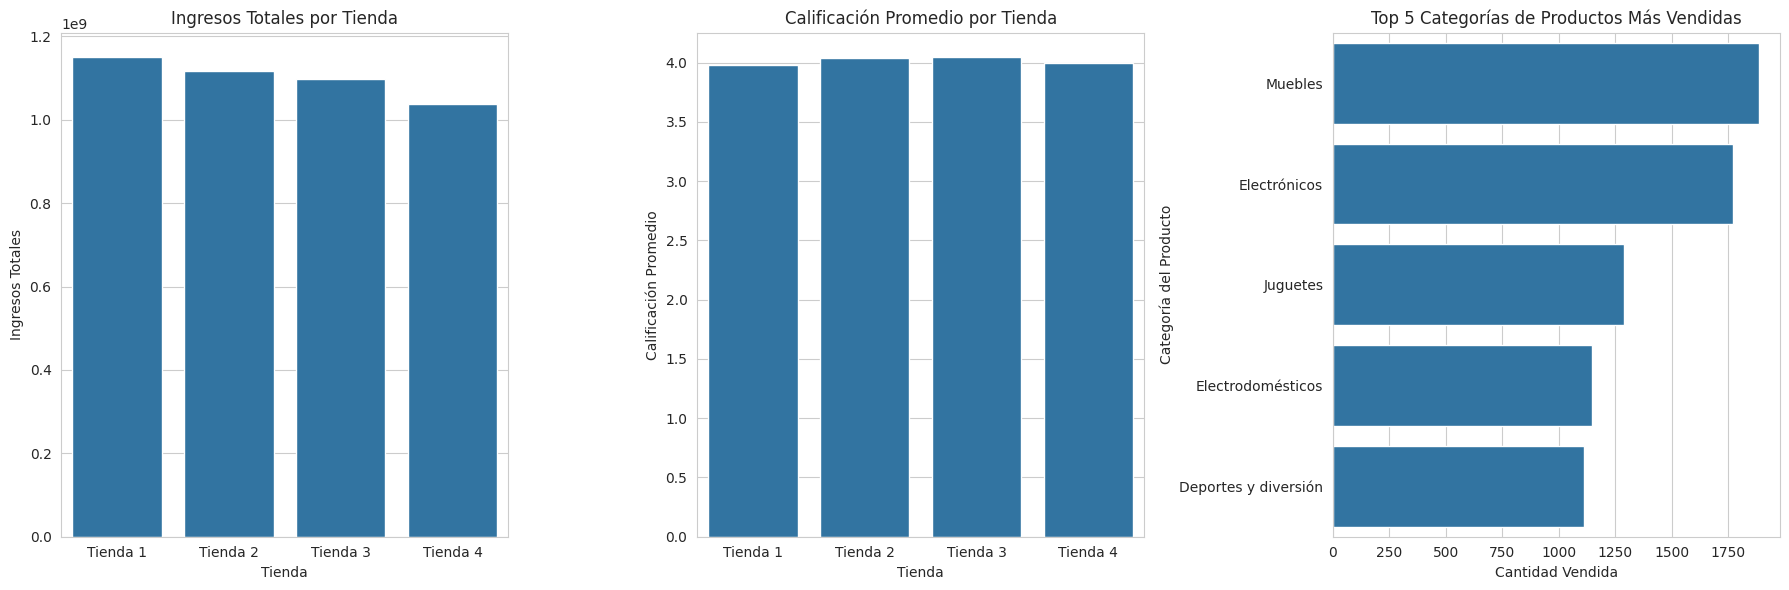

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(18, 6))

# 1. Ingresos Totales por Tienda
plt.subplot(1, 3, 1)
sns.barplot(x='Tienda', y='Ingresos Totales', data=revenue_by_store)
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales')

# 2. Calificación Promedio por Tienda
plt.subplot(1, 3, 2)
sns.barplot(x='Tienda', y='Calificación Promedio', data=average_rating_by_store)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')

# 3. Top 5 Categorías de Productos Más Vendidas
plt.subplot(1, 3, 3)
sns.barplot(x='Cantidad Vendida', y='Categoría del Producto', data=top_categories_overall.head(5))
plt.title('Top 5 Categorías de Productos Más Vendidas')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Categoría del Producto')

plt.tight_layout()
plt.show()

# 7. Recomendación para el Sr. Joao

### Análisis Clave:

1.  **Ingresos Totales por Tienda (revenue_by_store):**
    *   **Tienda 1:** 1.150.880.000
    *   **Tienda 2:** 1.116.344.000
    *   **Tienda 3:** 1.098.020.000
    *   **Tienda 4:** 1.038.376.000
    
    La Tienda 1 genera consistentemente los ingresos más altos, seguida de cerca por la Tienda 2.

2.  **Calificación Promedio por Tienda (avg_rating_by_store):**
    *   **Tienda 1:** 3.98
    *   **Tienda 2:** 4.04
    *   **Tienda 3:** 4.05
    *   **Tienda 4:** 4.00
    
    La Tienda 3 tiene la calificación promedio más alta, seguida por la Tienda 2. La Tienda 1, aunque con los mayores ingresos, tiene una calificación ligeramente más baja que las Tiendas 2, 3 y 4.

3.  **Categorías de Productos Más Vendidas (top_categories_overall):**
    *   A nivel global, las categorías de productos más vendidas son **Muebles**, **Electrónicos** y **Juguetes**.
    *   Estas categorías también dominan en ventas por tienda, con **Muebles** y **Electrónicos** siendo los principales impulsores en todas las tiendas.

4.  **Productos Más Vendidos (top_products_overall):**
    *   Entre los productos individuales más vendidos se encuentran 'Mesa de noche', 'Carrito de control remoto', 'Microondas', 'Batería', 'Cama king', 'Secadora de ropa', 'Modelado predictivo', 'Set de ollas', 'Cama box' y 'Bloques de construcción'. Muchos de estos productos pertenecen a las categorías de Muebles y Electrodomésticos.

5.  **Costo de Envío Promedio por Tienda (avg_shipping_cost_by_store):**
    *   **Tienda 1:** 26.018,61
    *   **Tienda 2:** 25.216,24
    *   **Tienda 3:** 24.805,68
    *   **Tienda 4:** 23.459,46
    
    La Tienda 1 tiene el costo de envío promedio más alto, mientras que la Tienda 4 tiene el más bajo. Esto podría influir en la rentabilidad neta, a pesar de los altos ingresos de la Tienda 1.

### Recomendación Estratégica para el Sr. Joao:

Basándonos en el análisis, las siguientes recomendaciones son cruciales para optimizar el rendimiento de las tiendas:

1.  **Foco en la Tienda 1 y Tienda 2 para el Crecimiento de Ingresos:** La **Tienda 1** es claramente la líder en ingresos, mientras que la **Tienda 2** también muestra un fuerte desempeño en ingresos y una buena calificación promedio. Se recomienda invertir en marketing y expansión para estas tiendas, capitalizando su base de clientes y su capacidad para generar ventas.

2.  **Mejorar la Satisfacción del Cliente en la Tienda 1:** Aunque la Tienda 1 es la que más vende, su calificación promedio (3.98) es la más baja. Es fundamental investigar las causas de esta menor satisfacción (por ejemplo, tiempos de envío, calidad del producto, servicio al cliente) y aplicar mejoras para alinear su calificación con sus altos ingresos y con la de otras tiendas como la Tienda 3.

3.  **Optimización de Costos de Envío:** La **Tienda 1** tiene el costo de envío promedio más alto. Se sugiere revisar la logística y los proveedores de envío de la Tienda 1 para identificar oportunidades de reducción de costos sin comprometer los tiempos de entrega. Asimismo, se podría investigar las prácticas de la Tienda 4, que tiene los costos de envío más bajos, para replicar modelos exitosos.

4.  **Capitalizar las Categorías y Productos Estrella:** Las categorías de **Muebles**, **Electrónicos** y **Juguetes** son consistentemente las más vendidas. Se recomienda asegurar un stock adecuado y ofrecer promociones específicas en productos como 'Mesa de noche', 'Carrito de control remoto' y 'Microondas' en todas las tiendas. Un análisis más profundo de los márgenes de beneficio de estos productos podría guiar futuras decisiones de inventario y precios.

5.  **Analizar el éxito de la Tienda 3 en Calificación:** La **Tienda 3** tiene la calificación promedio más alta (4.05). Sería beneficioso analizar sus prácticas operacionales y de servicio al cliente para identificar qué la hace exitosa en este aspecto y aplicar estas mejores prácticas en las otras tiendas, especialmente en la Tienda 1.

En resumen, el Sr. Joao debería centrarse en consolidar el liderazgo en ventas de la Tienda 1 y 2, mejorar la experiencia del cliente en la Tienda 1 y optimizar los costos de envío. Al mismo tiempo, debe continuar potenciando las categorías de productos que demuestran ser los principales impulsores de ventas en todo el negocio.